<a href="https://colab.research.google.com/github/nedokormysh/OpenEdu_HSE_INTRML/blob/week2/Copy_of_Sklearn_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание по 2 неделе.

# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [9]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import numpy as np
from matplotlib import pyplot as plt

In [10]:
#TODO

X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.5)

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)

In [13]:
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={
                                        # 'n_neighbors': range(1, 21, 1),
                                         "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                                        # 'weights': ['uniform', 'distance'],
                                        # 'p': [1, 2, 3]
                                         },
                             cv=kf)

In [14]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [15]:
accuracy_score(y_test, grid_searcher.predict(X_test))

0.8

In [16]:
def accuracy(y, y_pred):
  return np.sum(y == y_pred) / len(y)

In [17]:
accuracy(y_test, grid_searcher.predict(X_test))

0.8

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


In [21]:
# def train_grid_search(X, y):
# # TODO

# mean_test_scores = []
# for i in range(1000):
#   X, y = make_moons(n_samples=1000, noise=0.5)
#   mean_test_score = train_grid_search(X, y)
#   mean_test_scores.append(mean_test_score)

# mean_test_scores = np.array(mean_test_scores)
# plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

In [19]:
# for i in range(1, 21, 1):
#   print(i)

In [20]:
# [print(i) for i in range(1, 21, 1)]

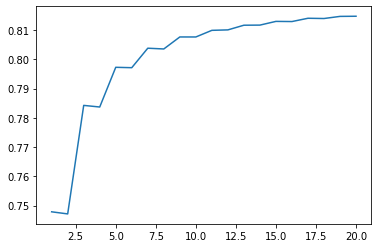

In [22]:
def train_grid_search(X, y):
  grid_searcher = GridSearchCV(KNeighborsClassifier(),
                          param_grid={
                          "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                          # "n_neighbors": range(1, 21, 1)
     }
  )
  grid_searcher.fit(X, y)
  return grid_searcher.cv_results_["mean_test_score"]

mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

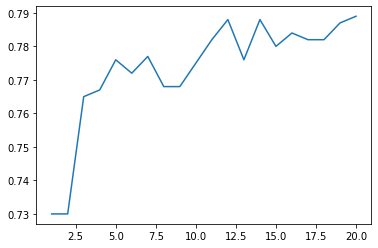

In [23]:
def train_grid_search(X, y):
  grid_searcher = GridSearchCV( KNeighborsClassifier(),
                               # KNeighborsRegressor(),
                               
                          param_grid={
                          "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                          # "n_neighbors": range(1, 21, 1)
     }
  )
  grid_searcher.fit(X, y)
  return grid_searcher.cv_results_["mean_test_score"]

mean_test_scores = []
# for i in range(1000):
X, y = make_moons(n_samples=1000, noise=0.5)
mean_test_score = train_grid_search(X, y)
mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [24]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘dir_with_mnist_data_files’: File exists
--2022-07-14 06:55:04--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  55.8MB/s    in 0.2s    

2022-07-14 06:55:05 (55.8 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-07-14 06:55:05--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... conne

In [25]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

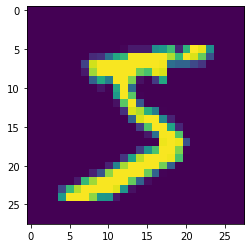

In [26]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [27]:
#TODO

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

kf3 = KNeighborsClassifier(n_neighbors=30)
kf3.fit(X_train, y_train)

accuracy_score(y_test, kf3.predict(X_test))

0.795

Третье оказалось неверным. Т.к. делал неверный сплит по X и y. Но возможно ещё что-то.

In [28]:
knn3_1 = KNeighborsClassifier(n_neighbors=30)
X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=0.2)

knn3_1.fit(X_train,y_train)
accuracy_score(y_test, knn3_1.predict(X_test))

0.9571666666666667

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?